# World Happiness Report 2021
## Context
The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Content
The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Import Data

In [2]:
data = pd.read_csv('world-happiness-report-2021.csv')
df = data.copy()

In [3]:
df.shape

(149, 20)

In [4]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
df.info() # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
df.isnull().sum()  # no missing values

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [7]:
any(df.duplicated()) # check duplicates

False

In [8]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [9]:
df.describe(include = 'object')

,Country name,Regional indicator
count,149,149
unique,149,10
top,North Cyprus,Sub-Saharan Africa
freq,1,36


- Happiness scores range from 2.52 to 7.84. Logged GDP per capita range from 6.63 to 11.65. Social support range from 0.46 to 0.98. Healthy life expectancy range from 48 to 76. Freedom range from  0.38 to 0.97. All of them are hardly skewed.
- Generosity range from -0.29 to 0.54. Right skewed. Half of the data is negative.
- Perceptions of corruption range from 0.08 to 0.94. Left skewed.

# EDA

In [10]:
df = df.drop(columns = ['Standard error of ladder score','upperwhisker','lowerwhisker','Ladder score in Dystopia','Country name'])

In [11]:
df.columns

Index(['Regional indicator', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

## Univariate Analysis

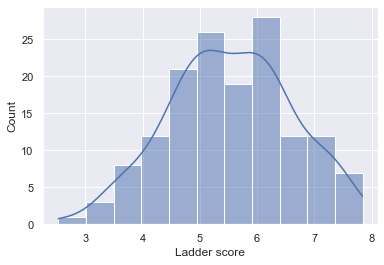

In [12]:
sns.histplot(x = 'Ladder score', data = df, kde = True);

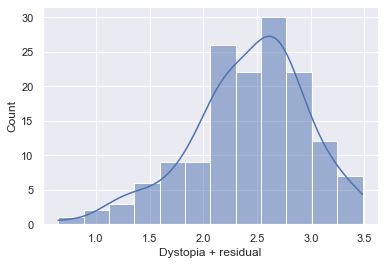

In [13]:
sns.histplot(x = 'Dystopia + residual', data = df, kde = True);

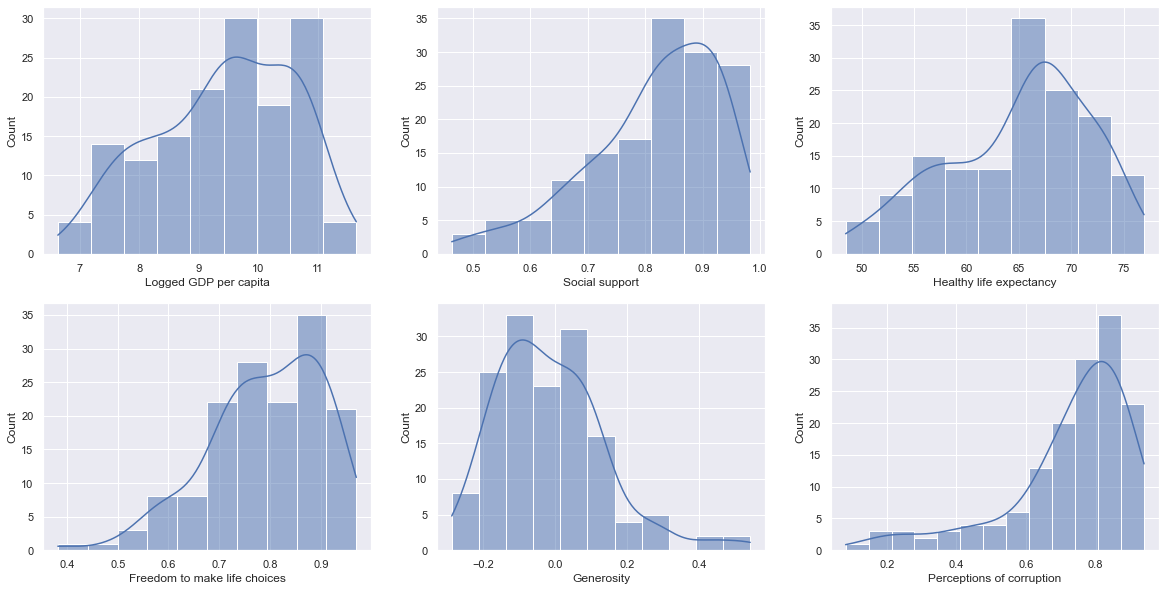

In [14]:
factor_cols = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices',
 'Generosity','Perceptions of corruption']
plt.figure(figsize = (20,10))
for i,factor in enumerate(factor_cols):
    plt.subplot(2,3,i + 1)
    sns.histplot(x = factor, data = df, kde = True);

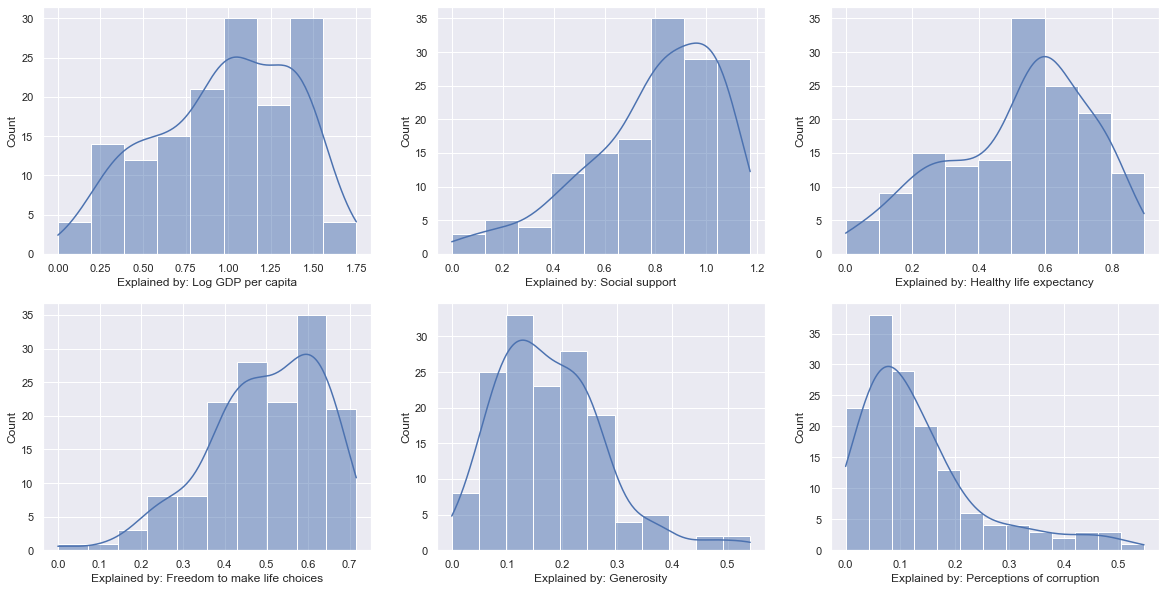

In [15]:
explained_cols = ['Explained by: Log GDP per capita','Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices','Explained by: Generosity', 'Explained by: Perceptions of corruption']
plt.figure(figsize = (20,10))
for i,factor in enumerate(explained_cols):
    plt.subplot(2,3,i + 1)
    sns.histplot(x = factor, data = df, kde = True);

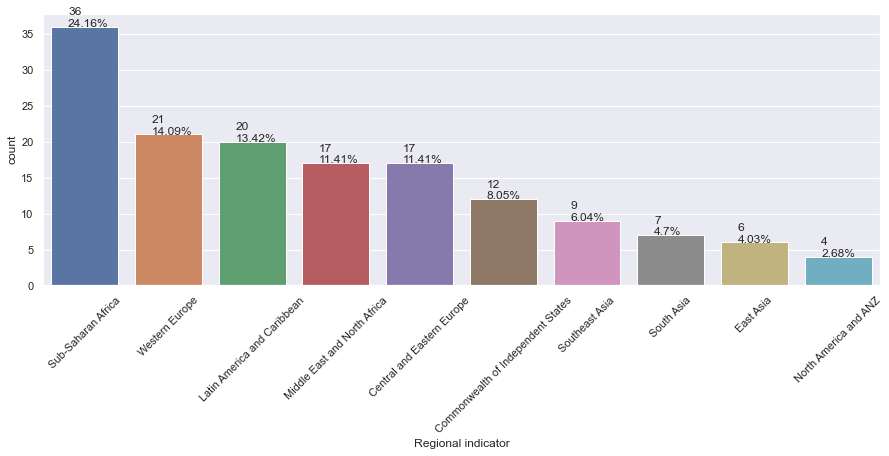

In [16]:
plt.figure(figsize = (15,5));
ax = sns.countplot(x = 'Regional indicator', data=df, order = df['Regional indicator'].value_counts().index);
plt.xticks(rotation = 45);
for p in ax.patches:
    perc = str(round(100 * p.get_height() / df.shape[0],2))
    annotation = str(p.get_height()) + '\n' + perc + '%'
    plt.annotate(annotation, (p.get_x() + p.get_width() / 2 - 0.2, p.get_y() + p.get_height()));

- Countries from Sub-Saharan Africa account for around 25%, followed by Western European countries (14%) and Latin America and Canibean countries (13%). 

## Bivariate Analysis

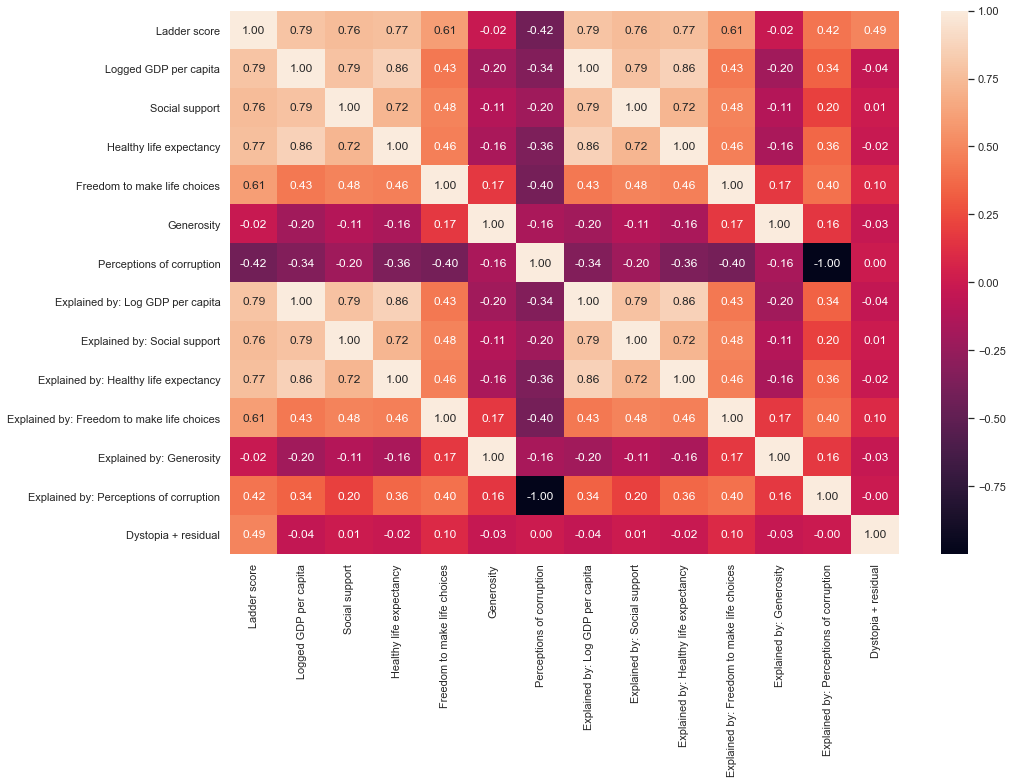

In [17]:
plt.figure(figsize = (15,10));
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f');

- The columns of Logged GDP per capita, Social support, Healthy life expectancy,Freedom to make life choices, and Generosity and the corresponding explained columns are identical.
- The column of Perceptions of corruption and the corresponding explained column are opposite.
- The column of Dystopia + residual should be the normalized score which equals to the sum of dystopia and residual.

In [18]:
df = df.drop(columns = explained_cols + ['Dystopia + residual']) # drop redundant columns

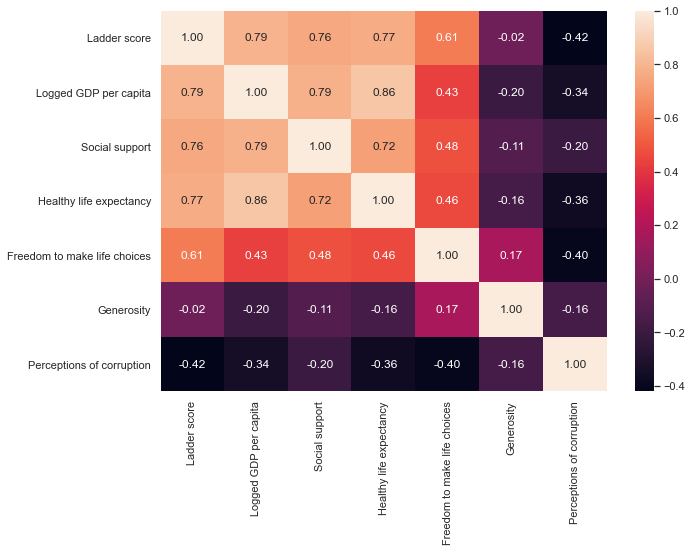

In [19]:
plt.figure(figsize = (10,7));
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f');

- Ladder score has high positive correlation with GDP, social support, life expectancy and freedom.
- Ladder score has moderate positive correlation with perception of corruption.
- Ladder score has little correlation with generosity.
- GDP has high positive correlation with social support, life expectancy.
- Social support has high positive correlation with life expectancy.

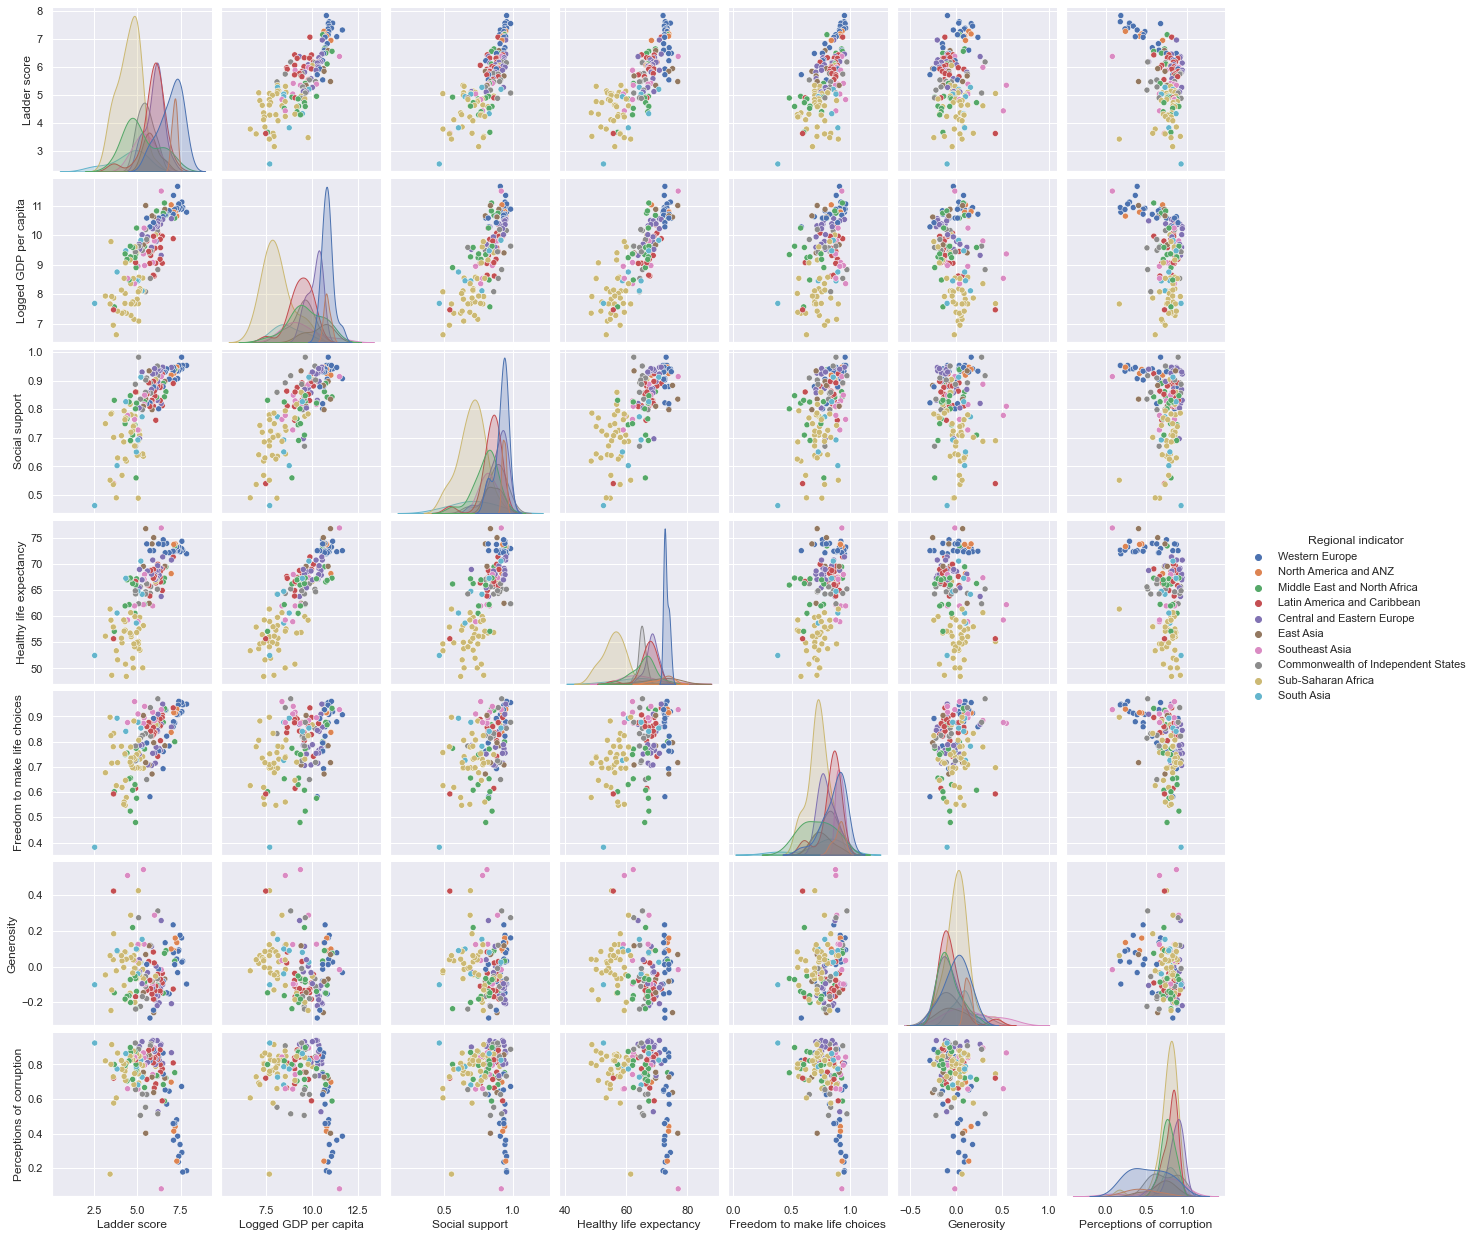

In [20]:
sns.pairplot(data = df,diag_kind = 'kde', hue = 'Regional indicator');

### Regional indicator vs Ladder score

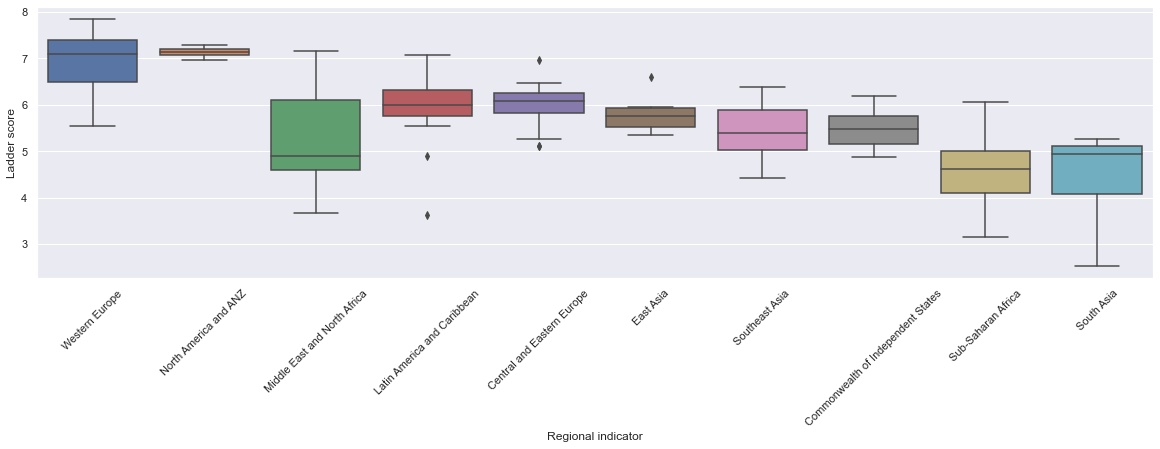

In [21]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Regional indicator', y = 'Ladder score', data = df);
plt.xticks(rotation = 45);

- Western Europe and North America and ANZ(Australia and New Zealand) achieve the highest scores. And the variance among the countries in North America and ANZ is much smaller than any other regions.
- Middle East, sub-Saharan Africa and South Asia display lowest scores and largest variances.
- Other regions have moderate score and small variance.

### Regional indicator vs GDP

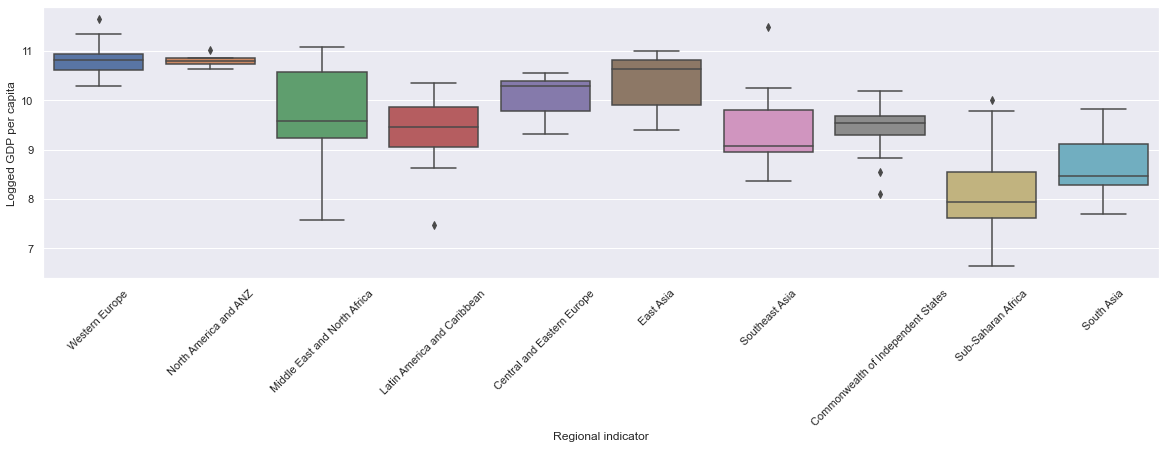

In [22]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Regional indicator', y = 'Logged GDP per capita', data = df);
plt.xticks(rotation = 45);

- Western Europe and North America and ANZ again perform best in the category of GDP. Followed by East Asia, Central and Eastern Europe.
- Sub-Saharan Africa and South Asia have the lowest GDP.

### Regional indicator vs Social support

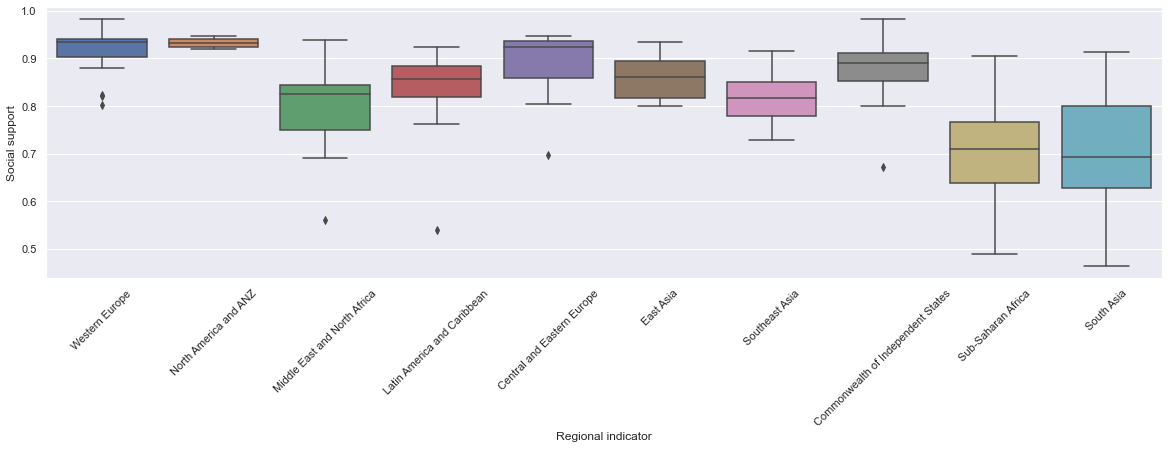

In [23]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Regional indicator', y = 'Social support', data = df);
plt.xticks(rotation = 45);

- Sub-Saharan Africa and South Asia have the worst social support.

### Regional indicator vs Lift expectancy

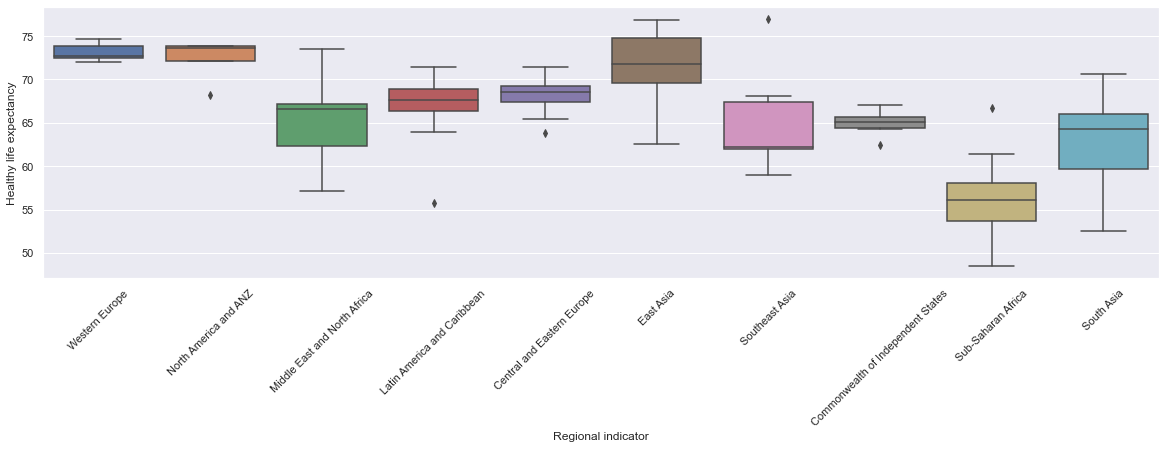

In [24]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Regional indicator', y = 'Healthy life expectancy', data = df);
plt.xticks(rotation = 45);

- East Asia, Western Europe and North America and ANZ have the highest life expectancy.
- Sub-Saharan Africa has the lowest life expectancy.

### Regional indicator vs freedom

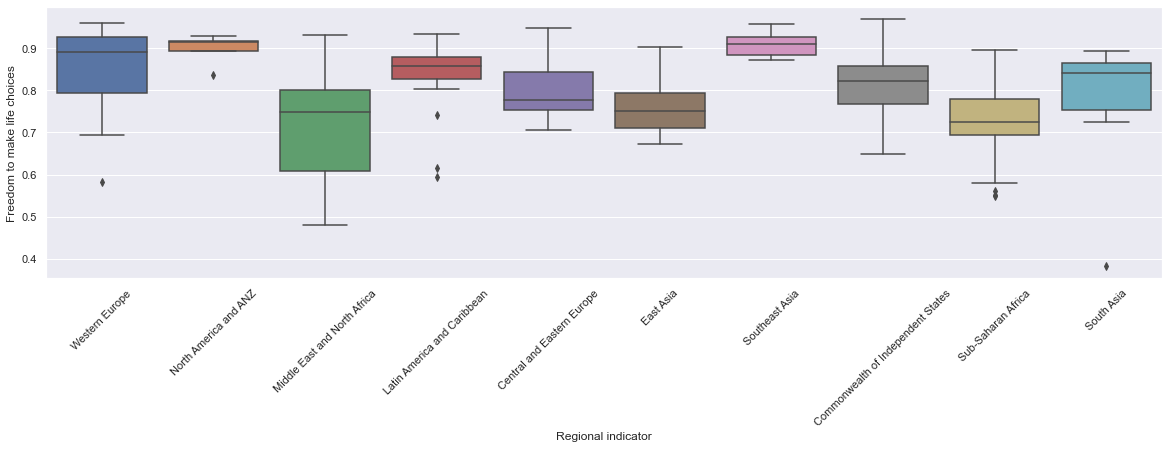

In [25]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Regional indicator', y = 'Freedom to make life choices', data = df);
plt.xticks(rotation = 45);

- Southeast Asia, Western Europe and North America and ANZ account for the first three places, while Middle East and North Africa and Sub-Saharan Africa show least freedom.

### Regional indicator vs Generosity

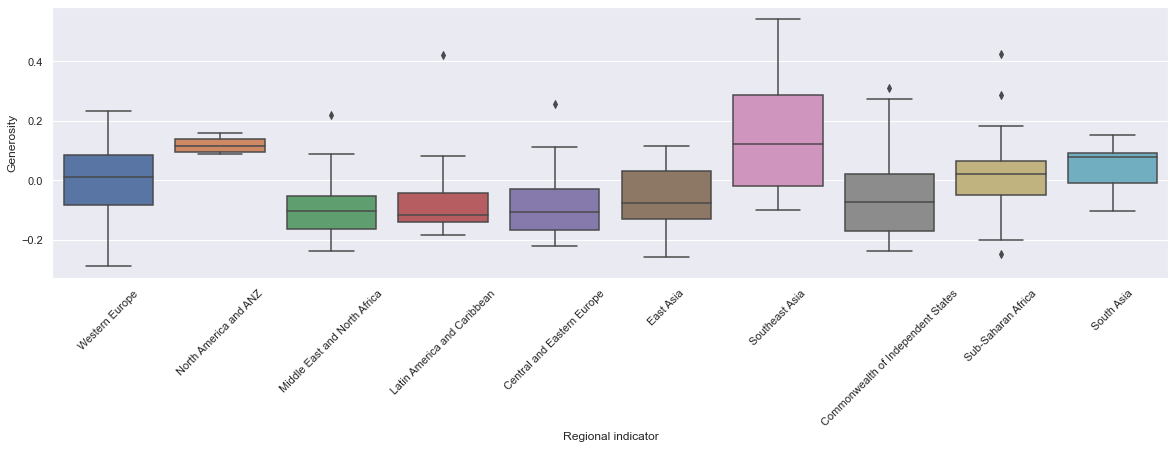

In [26]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Regional indicator', y = 'Generosity', data = df);
plt.xticks(rotation = 45);

- Southeast Asia shows the highest generosity.

### Regional indicator vs Perceptions of corruption

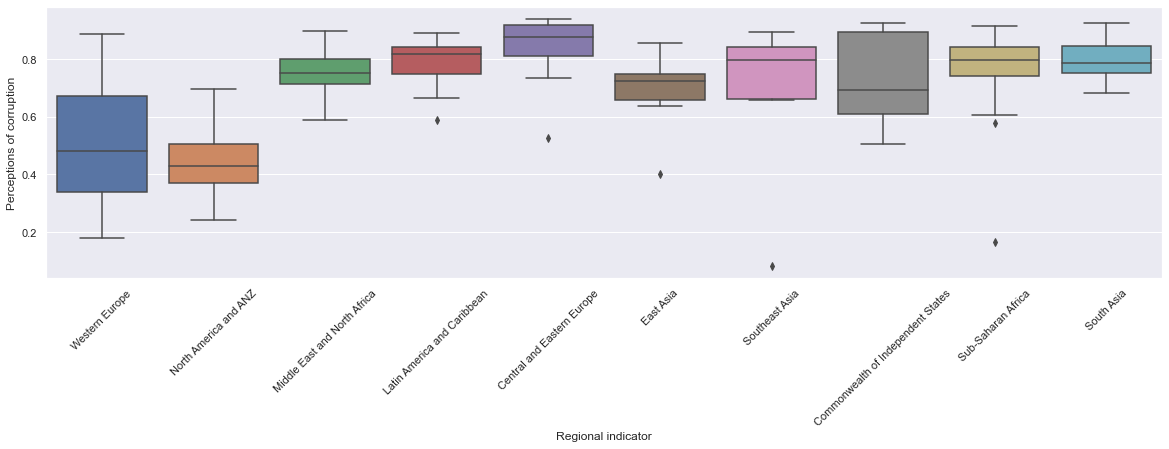

In [27]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Regional indicator', y = 'Perceptions of corruption', data = df);
plt.xticks(rotation = 45);

- Central and Eastern Europe shows the highest perception of corruption, while Western Europe and North America and ANZ are among the lowest.

# Regression

In [28]:
df.head()

,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [29]:
y = df['Ladder score']
X = df[['Regional indicator','Logged GDP per capita','Social support','Healthy life expectancy',
        'Freedom to make life choices','Generosity','Perceptions of corruption']]
X = pd.get_dummies(X, drop_first = True)
X.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,10.775,0.954,72.0,0.949,-0.098,0.186,0,0,0,0,0,0,0,0,1
1,10.933,0.954,72.7,0.946,0.030,0.179,0,0,0,0,0,0,0,0,1
2,11.117,0.942,74.4,0.919,0.025,0.292,0,0,0,0,0,0,0,0,1
3,10.878,0.983,73.0,0.955,0.160,0.673,0,0,0,0,0,0,0,0,1
4,10.932,0.942,72.4,0.913,0.175,0.338,0,0,0,0,0,0,0,0,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 6, shuffle = True)

In [31]:
def compute_metrices(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared = False)
    mae = mean_absolute_error(y, y_pred)
    return r2, rmse, mae

def regression_metrices(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    r2_train, rmse_train, mae_train = compute_metrices(model, X_train, y_train)
    r2_test, rmse_test, mae_test = compute_metrices(model, X_test, y_test)
    metrics = pd.DataFrame([[r2_train,rmse_train, mae_train],
                            [r2_test, rmse_test, mae_test]],
                            columns = ['R^2', 'RMSE', 'MAE'])
    return metrics

## Linear Regression

In [32]:
lr = make_pipeline(MinMaxScaler(), LinearRegression(n_jobs = -1))
regression_metrices(lr, X_train, y_train, X_test, y_test)

,R^2,RMSE,MAE
0,0.809944,0.463497,0.344608
1,0.780426,0.509161,0.376418


- No overfitting. R^2 is about 0.8.

In [33]:
pd.DataFrame(data = lr.named_steps['linearregression'].coef_, 
             index = X_train.columns, 
             columns = ['coefficients'])

,coefficients
Logged GDP per capita,1.268580
Social support,0.804759
Healthy life expectancy,0.580935
Freedom to make life choices,1.256201
Generosity,0.457338
Perceptions of corruption,-0.384542
Regional indicator_Commonwealth of Independent States,-0.396047
Regional indicator_East Asia,-0.465334
Regional indicator_Latin America and Caribbean,0.092375
Regional indicator_Middle East and North Africa,-0.297160


In [34]:
diff = pd.DataFrame(data = {'ground truth': y_test,'prediction':lr.predict(X_test)})
diff['residual'] = diff['prediction'] - diff['ground truth']
diff.sort_values(by = 'residual', ascending = False)

,ground truth,prediction,residual
146,3.415,5.064568,1.649568
73,5.536,6.525252,0.989252
96,5.066,5.922547,0.856547
87,5.266,5.965847,0.699847
72,5.545,6.119840,0.574840
39,6.189,6.622749,0.433749
120,4.607,4.977222,0.370222
123,4.574,4.897940,0.323940
83,5.339,5.619227,0.280227
129,4.308,4.530858,0.222858


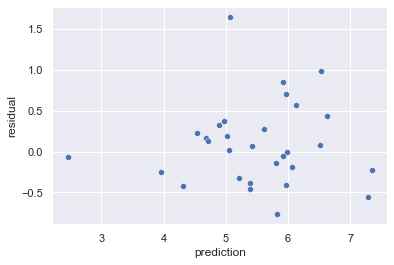

In [35]:
sns.scatterplot(x = 'prediction', y = 'residual', data = diff);

In [36]:
diff['residual'].mean()

0.09352678586112434

- Reviewing the test set, it seems most of the predictions are quite close to the ground truth.
- However, based on EDA, there're high multicollinearity exist between several predictors. Besides, the scatterplot of predicted value vs residual shows heteroscedasticity and the mean of residuals is not equal to 0. 

Let's check VIF on predictors.

In [37]:
vif = pd.DataFrame(columns = ['VIF'])
for i, feature in enumerate(X.columns):
    vif.loc[feature,:] = variance_inflation_factor(X.values, i)
vif

,VIF
Logged GDP per capita,401.579
Social support,175.403
Healthy life expectancy,365.813
Freedom to make life choices,94.8091
Generosity,1.34772
Perceptions of corruption,24.4853
Regional indicator_Commonwealth of Independent States,1.70999
Regional indicator_East Asia,1.4731
Regional indicator_Latin America and Caribbean,2.30955
Regional indicator_Middle East and North Africa,1.99415


- Logged GDP per capita, Social support,Healthy life expectancy, Freedom to make life choices and Perceptions of corruption have vif > 5, indicating high multicollinearity.
- Independent variables don't meet the assumptions of Linear regression. Let's try decision tree based ensemble methods which make no assumptions on the input.

## Ensemble Method
### Gradient Boost

In [38]:
gbr = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(random_state= 2))
regression_metrices(gbr, X_train, y_train, X_test, y_test)

,R^2,RMSE,MAE
0,0.990944,0.101174,0.081391
1,0.833068,0.443951,0.350157


- Overfitting.

In [39]:
gbr_tuned = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(random_state= 2))
param = {
    'gradientboostingregressor__learning_rate': np.arange(0.1,1,0.1),
    'gradientboostingregressor__n_estimators': np.arange(100,500,50),
    'gradientboostingregressor__subsample': [0.5,0.6,0.7,0.8,0.9],
    'gradientboostingregressor__max_features':['auto','sqrt','log2'],
}
clf = RandomizedSearchCV(estimator = gbr_tuned, param_distributions = param,n_iter=50, 
                   scoring='r2', n_jobs=-1, cv=5, random_state = 9).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.7844987913624288
{'gradientboostingregressor__subsample': 0.5, 'gradientboostingregressor__n_estimators': 100, 'gradientboostingregressor__max_features': 'log2', 'gradientboostingregressor__learning_rate': 0.1}


In [40]:
gbr_tuned = clf.best_estimator_
regression_metrices(gbr_tuned, X_train, y_train, X_test, y_test)

,R^2,RMSE,MAE
0,0.976080,0.164431,0.134676
1,0.808466,0.475541,0.375072


- No improvement.

### Random Forest

In [41]:
rfr = make_pipeline(MinMaxScaler(), RandomForestRegressor(n_jobs = -1,random_state = 20))
regression_metrices(rfr, X_train, y_train, X_test, y_test)

,R^2,RMSE,MAE
0,0.967487,0.191704,0.148649
1,0.768752,0.522521,0.389637


- Overfitting.

In [42]:
rfr_tuned = make_pipeline(MinMaxScaler(), RandomForestRegressor(n_jobs = -1,random_state = 20))
param = {
    'randomforestregressor__max_depth': np.arange(2,7,1),
    'randomforestregressor__n_estimators': np.arange(100,300,50),
    'randomforestregressor__max_samples': [0.5,0.6,0.7,0.8,0.9],
    'randomforestregressor__max_features':['auto','sqrt','log2'],
}
clf = RandomizedSearchCV(estimator = rfr_tuned, param_distributions = param,n_iter=50, 
                   scoring='r2', n_jobs=-1, cv=5, random_state = 9).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.7697470778120901
{'randomforestregressor__n_estimators': 150, 'randomforestregressor__max_samples': 0.7, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': 6}


In [43]:
rfr_tuned = clf.best_estimator_
regression_metrices(rfr_tuned, X_train, y_train, X_test, y_test)

,R^2,RMSE,MAE
0,0.936154,0.268641,0.209686
1,0.782279,0.507008,0.384411


- Still Overfitting.

# Conclusion
- Linear regression is the most effective model among the three models we try. It fits fairly well with train and test set and give a R^2 of around 0.8. The other two models are gradient boosting regressor and random forest regressor, both of which are overfitting even after hyperparameter tuning.
- However, the independent variables actually violate the assumptions of linear regression, which expecially show high multicollinearity.
- Besides, the sample size is very small, which further lower the precision of the model.